<a href="https://colab.research.google.com/github/KhuyenLE-maths/House-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os 

In [ ]:
os.chdir('/content/drive/MyDrive/Machine learning/House price prediction/')

## I. Gathering data

This dataset contains house sale prices of King country, which includes Seattle. 
It includes house sold between 04/2014 and 05/2015. 

1. Unzip dataste

In [ ]:
from zipfile import ZipFile
for filename in os.listdir(os.getcwd()):
  if filename[-4:] == '.zip':
    with ZipFile(filename, 'r') as zip:
      zip.extractall()
      print('Done')

Done
Done


2. Read dataset

In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(df.shape)

(21613, 21)


In [ ]:
print('This dataset includes', df.shape[0], 'rows and', df.shape[1], 'columns.')

This dataset includes 21613 rows and 21 columns.


In [ ]:
print('All features of the dataset: ', list(df.columns))

All features of the dataset:  ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## II. Exploratory Data Analysis (EDA)

### Discover type of each column:

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

Comment: this dataset has 15 columns of type integer, 5 columns of type float (real number) and 1 object type column (date column)

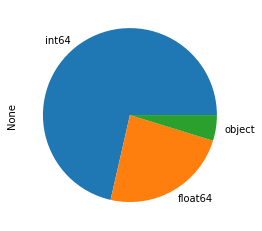

In [ ]:
df.dtypes.value_counts().plot.pie()

### 1. Verify if the dataset contains any NaN value: 

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2. Statistical description of dataset

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Histograms of continous variables:

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
#for col in df.select_dtypes('float64'):
 # plt.figure(figsize = (10,8))
 # sns.distplot(df[col])
 # plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


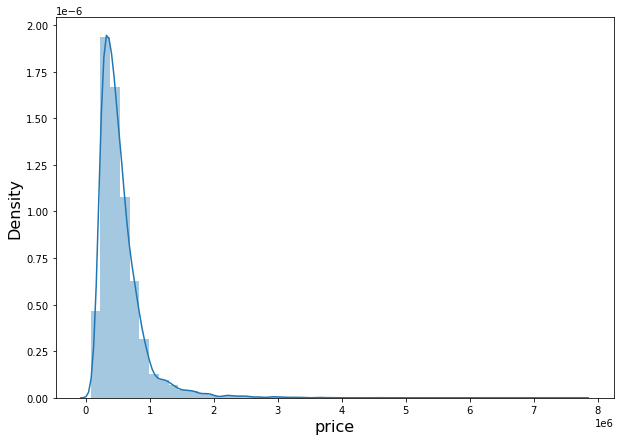

In [ ]:
# the distribution of price:
plt.figure(figsize = (10,7))
sns.distplot(df['price'],hist = True, label = 'Price')
plt.xlabel('price', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.show()

**Comment**: Based on the figure above, we see that 
- Almost house prices are distributed from 0 to 1 million dollars. 
- Prices around 0.5 millions dollars appear most frequently.
- There exist some outliers values that we can skip in order to present their influence to our ML model. 

### Visualize the numbers of floors, bathrooms and bedrooms 

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


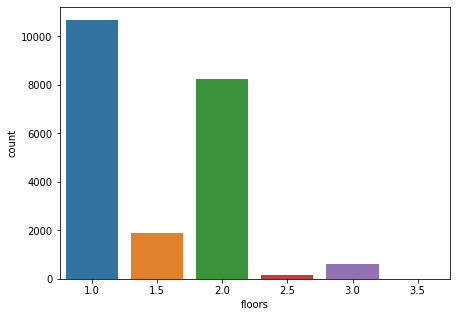

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


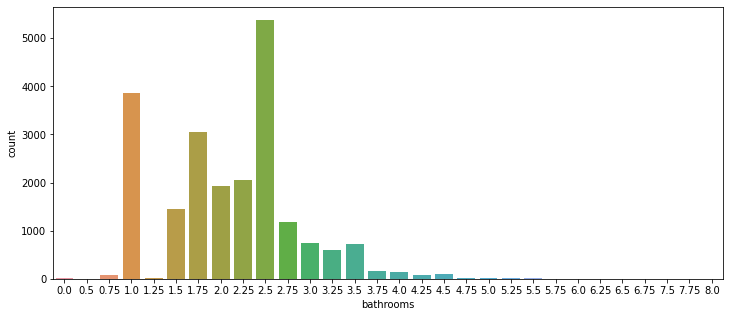

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


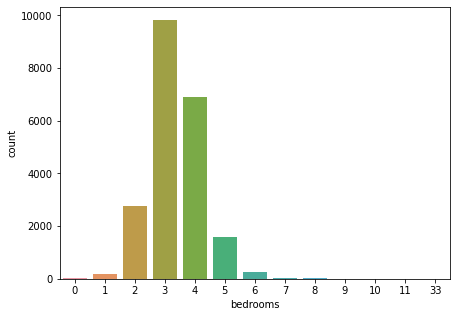

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(df['floors'])
plt.show()

plt.figure(figsize = (12,5))
sns.countplot(df['bathrooms'])
plt.show()

plt.figure(figsize = (7,5))
sns.countplot(df['bedrooms'])
plt.show()

### Find the correlation between variables:

In [ ]:
#sns.pairplot(df)

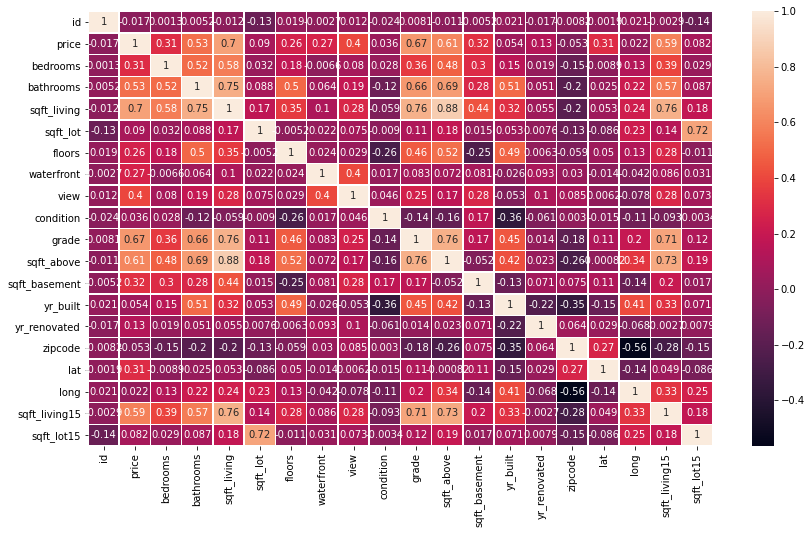

In [ ]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True)

Find the correlations of price with other features: 

In [ ]:
df.corr()["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Comment: The above result shows that the price is highly correlated with some variables as sqft_living, grade, sqft_above, sqft_living15 and bathrooms. 
Id and zipcode have very weak correlations with the price. 

## III. Preprocessing data

1. Reject outliers 

Based on the distribution of price, there is only some values which are larger than 2.5 million. Therefore we can consider $\tau = 2.5 \times 10^6$ as a threshold for filtering the outliers. All the house whose prices larger than $\tau$ will be dropped from the dataset. 

In [ ]:
t = 2.5*10**6
df_new = df[df['price']<= t]

In [ ]:
df_new.shape

(21516, 21)

In [ ]:
df.shape[0] - df_new.shape[0]

97

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


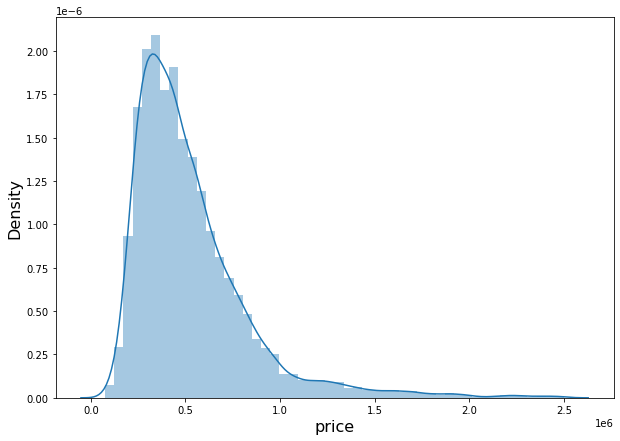

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df_new['price'])
plt.xlabel('price', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.show()

2. Variable selection 

As the features date, id and zipcode are not much correlated to our target, then they are rejected.

In [ ]:
df_new = df_new.drop(['id','date', 'zipcode'], axis = 1)

In [ ]:
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<Figure size 576x576 with 0 Axes>

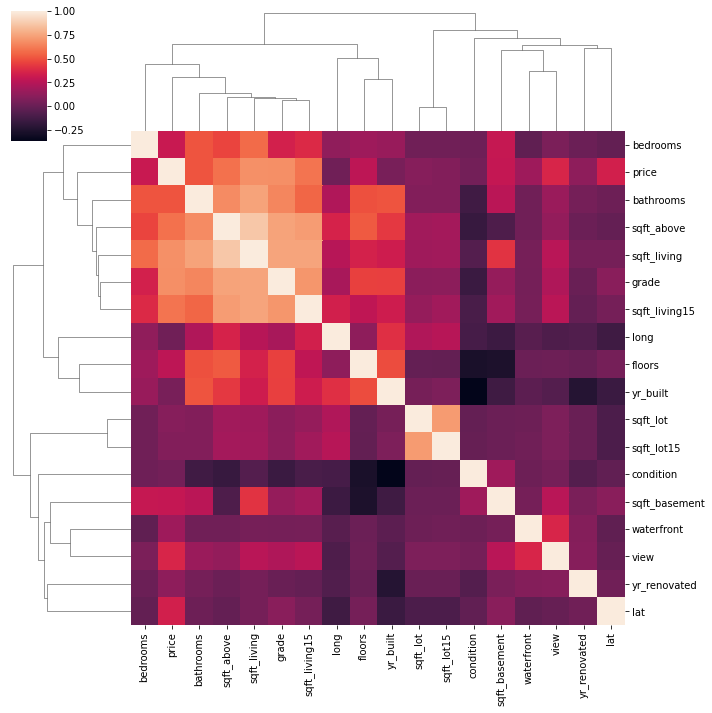

In [ ]:
plt.figure(figsize = (8,8))
sns.clustermap(df_new.corr())

### Split randomly the dataset into training and test sets, where the ratio of test set is 20%. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df_new, test_size = 0.2, random_state = 0)

In [ ]:
print('Train size: ', train_set.shape[0], 'Test size: ', test_set.shape[0])

Train size:  17212 Test size:  4304


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

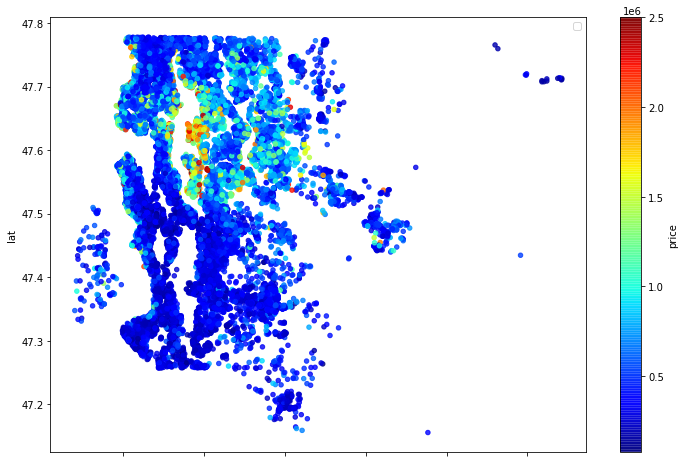

In [ ]:
plt.figure()
df_new.plot(kind = 'scatter', x = 'long', y = 'lat', alpha = 0.8, c = 'price',cmap=plt.get_cmap('jet'), figsize = (12,8))
plt.legend()
plt.show()

### Normalize data 

In [ ]:
X_train = train_set.drop('price', axis = 1)
y_train = train_set['price']
X_test = test_set.drop('price', axis = 1)
y_test = test_set['price']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)

(17212, 17) (4304, 17)


## IV: Modelization and Evaluation
We are going to try different models as Linear Regression, Decision Tree, Random Forest than select the best model. 

Measure the performance by Root Mean Square Error: 
$$ RMSE = \sqrt{ \dfrac{1}{n} \sum_{i = 1}^n (f(x^{(i)}) - y^{(i)})^2} $$

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

1. Linear Regresison model



In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lin = lin_reg.predict(X_test)
y_test1 = np.array(y_test)

In [ ]:
mse_lin = mean_squared_error(y_test,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print('RMSE of Linear Regression is: ', round(rmse_lin,1))

RMSE of Linear Regression is:  167347.9


2. Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test1, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print('RMSE of Decision Tree is: ', round(rmse_tree,1))

RMSE of Decision Tree is:  162526.1


3. Random Forest Regressor method

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_forest = forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test1, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
print('RMSE of Random Forest method is: ', round(rmse_forest,1))

RMSE of Random Forest method is:  113998.7


In [ ]:
forest_reg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## VI. Hyperparameter tuning
Among the three models, RandomForestRegressor gives us the best result. We are going to improve this model by finding the best hyperparameters for it. This can be helped by GridSearchCV function from Scikit-learn package. This function allows us to train the model with diferent hyperparameters, then it determine automatically a parameter combination that give us the best performance. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
forest_reg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
params_grid = [{'bootstrap': [False, True],
                'min_samples_split': [2,4,5],
                'n_estimators': [100,150,200],
                'max_features': [8,10,12]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, params_grid, cv = 5, 
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

We have $2 \times 3 \times 3 \times 3 = 54$ combinations of hyperparameters bootsrap, n_estimatos and max_features. Besides, each model is trained 5 times, which is corresponding to the cross validation value. Therefore, we have in total $54 \times 5 = 270$ turns of training. 

Once the training finishs, we can obtain the best model which corresponding to the best paramters:



In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 12,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=12, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## VII. Prediction

In [ ]:
y_pred_final = final_model.predict(X_test)
mse_final = mean_squared_error(y_test1, y_pred_final)
rmse_final = np.sqrt(mse_final)
print('RMSE of final model is: ', round(rmse_final,1))

RMSE of final model is:  110876.8


Visualizing the predicted and the true targets of the first 100 data point in test set: 

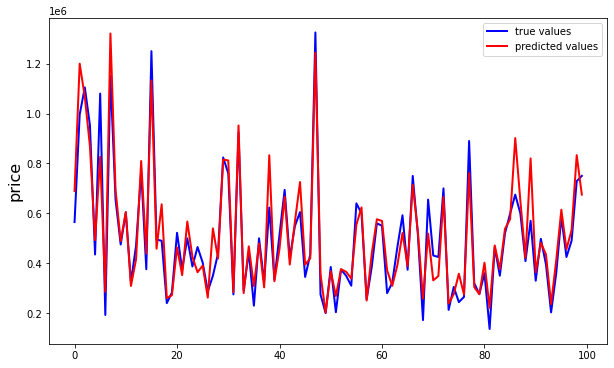

In [ ]:
some_values = X_test[:100]
y_pred_some_values = final_model.predict(some_values)
y_true_some_values = y_test1[:100]

plt.figure(figsize = (10,6))
plt.plot(y_true_some_values, 'b', lw = 2, label = 'true values')
plt.plot(y_pred_some_values, 'r', lw = 2, label = 'predicted values')
plt.ylabel('price', fontsize = 16)
plt.legend()
plt.show()